In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import joblib as jb
import joblib

# Importing the Keras libraries and packages
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

import os
import pandas as pd
import numpy as np
import sys

from sklearn.preprocessing import MinMaxScaler

In [2]:

import keras
keras.__version__

'2.10.0'

In [3]:
import tensorflow
tensorflow.__version__

'2.10.1'

In [4]:
os.getcwd()

'e:\\Codes\\Mantis-Shrimp-Eye-s-Collision-Avoidance\\rnn'

In [5]:
os.chdir("../")
os.getcwd()

'e:\\Codes\\Mantis-Shrimp-Eye-s-Collision-Avoidance'

In [6]:
sys.path.append(os.getcwd()+"/tools")

In [7]:
from configmanager import ConfigurationManager
configurationManager = ConfigurationManager()

# Recurrent Neural Network

In [8]:
# Importing the training set

dnn_rnn_dataset =  configurationManager.config_readable['dnn_rnn_dataset']
rnn_trajectory_model_folder = configurationManager.config_readable['rnn_trajectory_model_folder']

path_rnn_train = dnn_rnn_dataset+"dnn_train.csv"
path_rnn_train = dnn_rnn_dataset+"fake_train.csv"


dataset_train = pd.read_csv(path_rnn_train)


dataset_train.head()

,distance,x_center,x_pred,x_pred[0],y_center,y_pred,y_pred[0]
0,11.253262,617,0,0.0,242,0,0.0
1,11.253262,617,0,0.0,242,0,0.0
2,11.253262,617,0,0.0,242,0,0.0
3,11.253262,618,0,0.0,242,0,0.0
4,11.090219,618,0,0.0,243,0,0.0


In [9]:
def normalize_data(df_copy, train_ise_save_true_val_ise_false=False):
    
    sc = MinMaxScaler(feature_range = (0, 1))

    for col in df_copy.columns:
      df_copy[col] = sc.fit_transform(df_copy[col].values.reshape(-1,1))
      if train_ise_save_true_val_ise_false:
        scaler_filename = rnn_trajectory_model_folder+col+"_transform.save"
        joblib.dump(sc, scaler_filename)
    
    '''
    df_copy['y_pred'] = sc.fit_transform(df_copy['y_pred'].values.reshape(-1,1))
    scaler_filename = normalization_path+ FILE_NAME+"_y_pred_transform"+".save"
    joblib.dump(sc, scaler_filename)'''

    return df_copy

In [10]:
dataset_train = dataset_train.iloc[:, [0,1 , 4]]
dataset_train.head(10)

,distance,x_center,y_center
0,11.253262,617,242
1,11.253262,617,242
2,11.253262,617,242
3,11.253262,618,242
4,11.090219,618,243
5,11.079277,619,243
6,11.079277,619,243
7,11.090219,618,243
8,11.079277,619,243
9,11.079277,619,243


In [11]:
training_set = dataset_train.values
training_set

array([[ 11.25326237, 617.        , 242.        ],
       [ 11.25326237, 617.        , 242.        ],
       [ 11.25326237, 617.        , 242.        ],
       ...,
       [  8.05739399, 954.        , 277.        ],
       [  7.96557936, 956.        , 278.        ],
       [  8.05739399, 957.        , 277.        ]])

In [12]:
type(training_set)

numpy.ndarray

In [13]:

np.__version__


'1.21.6'

In [14]:
training_set.shape

(343, 3)

In [15]:
training_set[0:10]

array([[ 11.25326237, 617.        , 242.        ],
       [ 11.25326237, 617.        , 242.        ],
       [ 11.25326237, 617.        , 242.        ],
       [ 11.25326237, 618.        , 242.        ],
       [ 11.09021885, 618.        , 243.        ],
       [ 11.07927732, 619.        , 243.        ],
       [ 11.07927732, 619.        , 243.        ],
       [ 11.09021885, 618.        , 243.        ],
       [ 11.07927732, 619.        , 243.        ],
       [ 11.07927732, 619.        , 243.        ]])

In [16]:
type(training_set)

numpy.ndarray

In [17]:
training_set_scaled = normalize_data(dataset_train.copy(),train_ise_save_true_val_ise_false=True)

In [18]:
output_size = 10
input_size = 30
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

training_set = np.array(training_set)
data_set = training_set_scaled

for i in range(input_size, (len(training_set))-(output_size-1)):

  X_train.append(data_set[i-input_size:i].values)

  #temp = data_set[i-input_size:i, 1].values

  temp = data_set.loc[i:i+output_size-1, "x_center"].values
  print(temp)
  
  y_train.append(temp)


  
X_train, y_train = np.array(X_train), np.array(y_train)

[0.44701987 0.44288079 0.44039735 0.43625828 0.43211921 0.4263245
 0.42218543 0.41390728 0.41142384 0.40645695]
[0.44288079 0.44039735 0.43625828 0.43211921 0.4263245  0.42218543
 0.41390728 0.41142384 0.40645695 0.40149007]
[0.44039735 0.43625828 0.43211921 0.4263245  0.42218543 0.41390728
 0.41142384 0.40645695 0.40149007 0.39569536]
[0.43625828 0.43211921 0.4263245  0.42218543 0.41390728 0.41142384
 0.40645695 0.40149007 0.39569536 0.38907285]
[0.43211921 0.4263245  0.42218543 0.41390728 0.41142384 0.40645695
 0.40149007 0.39569536 0.38907285 0.38576159]
[0.4263245  0.42218543 0.41390728 0.41142384 0.40645695 0.40149007
 0.39569536 0.38907285 0.38576159 0.37748344]
[0.42218543 0.41390728 0.41142384 0.40645695 0.40149007 0.39569536
 0.38907285 0.38576159 0.37748344 0.37251656]
[0.41390728 0.41142384 0.40645695 0.40149007 0.39569536 0.38907285
 0.38576159 0.37748344 0.37251656 0.36837748]
[0.41142384 0.40645695 0.40149007 0.39569536 0.38907285 0.38576159
 0.37748344 0.37251656 0.36837

In [19]:
y_train.shape

(304, 10)

In [20]:
X_train.shape

(304, 30, 3)

In [21]:
# Reshaping
kac_tane = len(dataset_train.columns) 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], kac_tane))

In [22]:
X_train.shape

(304, 30, 3)

In [23]:
X_train[0]

array([[0.70228242, 0.48096026, 0.09836066],
       [0.70228242, 0.48096026, 0.09836066],
       [0.70228242, 0.48096026, 0.09836066],
       [0.70228242, 0.48178808, 0.09836066],
       [0.67162523, 0.48178808, 0.1147541 ],
       [0.66956789, 0.48261589, 0.1147541 ],
       [0.66956789, 0.48261589, 0.1147541 ],
       [0.67162523, 0.48178808, 0.1147541 ],
       [0.66956789, 0.48261589, 0.1147541 ],
       [0.66956789, 0.48261589, 0.1147541 ],
       [0.66956789, 0.48261589, 0.1147541 ],
       [0.63891112, 0.48261589, 0.08196721],
       [0.66956789, 0.48261589, 0.09836066],
       [0.73499695, 0.48178808, 0.09836066],
       [0.76771106, 0.48013245, 0.09836066],
       [0.76771106, 0.48013245, 0.09836066],
       [0.76771106, 0.47682119, 0.09836066],
       [0.73088185, 0.47764901, 0.1147541 ],
       [0.85251781, 0.47433775, 0.08196721],
       [0.76359638, 0.4718543 , 0.09836066],
       [0.70228242, 0.47019868, 0.1147541 ],
       [0.76771106, 0.46854305, 0.1147541 ],
       [0.

In [24]:
y_train.shape

(304, 10)

In [25]:
y_train.shape[0], y_train.shape[1]

(304, 10)

In [26]:
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))

In [27]:
y_train[0]

array([0.44701987, 0.44288079, 0.44039735, 0.43625828, 0.43211921,
       0.4263245 , 0.42218543, 0.41390728, 0.41142384, 0.40645695])

In [28]:
y_train[1]

array([0.44288079, 0.44039735, 0.43625828, 0.43211921, 0.4263245 ,
       0.42218543, 0.41390728, 0.41142384, 0.40645695, 0.40149007])

In [29]:
y_train.shape

(304, 10)

In [30]:
y_train.shape[1]

10

In [31]:
training_set[input_size]

array([ 11.72050541, 576.        , 245.        ])

In [32]:
X_train.shape[1]

30

In [33]:
X_train.shape[1], len(X_train[0][0])

(30, 3)

In [34]:
output_size

10

In [35]:
input_shape = (X_train.shape[1], len(X_train[0][0]))
input_shape

(30, 3)

In [37]:
X_train.shape

(304, 30, 3)

In [38]:
y_train.shape

(304, 10)

In [41]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], len(X_train[0][0]))))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = output_size))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
10/10 [==============================] - 5s 38ms/step - loss: 0.1699
Epoch 2/10
10/10 [==============================] - 0s 34ms/step - loss: 0.0732
Epoch 3/10
10/10 [==============================] - 0s 36ms/step - loss: 0.0354
Epoch 4/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0306
Epoch 5/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0239
Epoch 6/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0209
Epoch 7/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0197
Epoch 8/10
10/10 [==============================] - 0s 34ms/step - loss: 0.0182
Epoch 9/10
10/10 [==============================] - 0s 34ms/step - loss: 0.0167
Epoch 10/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0152


In [43]:
regressor.save(rnn_trajectory_model_folder+ "/lstm_x_center.h5")

# TEST

In [44]:
from tensorflow import keras
regressor = keras.models.load_model(rnn_trajectory_model_folder+ "/lstm_x_center.h5")

In [45]:
dataset_train = pd.read_csv(path_rnn_train)
dataset_x_center = dataset_train['x_center'].values
inputs_x_center = dataset_x_center.reshape(-1,1)

dataset_y_center = dataset_train['y_center'].values
inputs_y_center = dataset_y_center.reshape(-1,1)

dataset_distance = dataset_train['distance'].values
inputs_distance = dataset_distance.reshape(-1,1)



In [46]:
inputs_x_center.shape

(343, 1)

In [47]:
type(inputs_x_center)

numpy.ndarray

In [49]:
normalization_path = rnn_trajectory_model_folder 

In [50]:
scalar = joblib.load(normalization_path+"x_center"+"_transform.save")
test_set_scaled_x_center = scalar.transform(inputs_x_center)

print("scalar.transform(test_set_scaled_x_center)",test_set_scaled_x_center[0])

scalar.transform(test_set_scaled_x_center) [0.48096026]


In [51]:
scalar = joblib.load(normalization_path+"y_center"+"_transform.save")
test_set_scaled_y_center = scalar.transform(inputs_y_center)

print("scalar.transform(test_set_scaled_y_center)",test_set_scaled_y_center[0])

scalar.transform(test_set_scaled_y_center) [0.09836066]


In [52]:
scalar = joblib.load(normalization_path+"distance"+"_transform.save")
test_set_scaled_distance = scalar.transform(inputs_distance )

print("scalar.transform(test_set_scaled_distance)",test_set_scaled_distance[0])

scalar.transform(test_set_scaled_distance) [0.70228242]


In [53]:
# Creating a data structure with 60 timesteps and 1 output

X_Test = []
y_test = []
for i in range(input_size, (len(training_set))-(output_size-1)):
    X_Test.append([test_set_scaled_x_center[i-input_size:i, 0], test_set_scaled_y_center[i-input_size:i, 0], test_set_scaled_distance[i-input_size:i, 0]])
    #y_test.append(test_set_scaled[i:i+output_size, 0])
    y_test.append(test_set_scaled_x_center[i, 0])
X_Test, y_test = np.array(X_Test), np.array(y_test)


In [80]:
X_Test.shape

(304, 30, 3)

In [78]:
X_Test.shape[0], 3,X_Test.shape[2]

(304, 3, 30)

In [79]:
X_Test = np.reshape(X_Test, (X_Test.shape[0], X_Test.shape[2],3 ))


In [58]:
y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(304, 1)

In [72]:
X_Test[0].shape

(3, 30)

In [73]:
X_Test[0][1]

array([0.09836066, 0.09836066, 0.09836066, 0.09836066, 0.1147541 ,
       0.1147541 , 0.1147541 , 0.1147541 , 0.1147541 , 0.1147541 ,
       0.1147541 , 0.08196721, 0.09836066, 0.09836066, 0.09836066,
       0.09836066, 0.09836066, 0.1147541 , 0.08196721, 0.09836066,
       0.1147541 , 0.1147541 , 0.1147541 , 0.1147541 , 0.1147541 ,
       0.1147541 , 0.1147541 , 0.1147541 , 0.13114754, 0.13114754])

In [74]:
X_Test[1][0]

array([0.48096026, 0.48096026, 0.48178808, 0.48178808, 0.48261589,
       0.48261589, 0.48178808, 0.48261589, 0.48261589, 0.48261589,
       0.48261589, 0.48261589, 0.48178808, 0.48013245, 0.48013245,
       0.47682119, 0.47764901, 0.47433775, 0.4718543 , 0.47019868,
       0.46854305, 0.46688742, 0.46440397, 0.46109272, 0.45778146,
       0.45778146, 0.45529801, 0.45281457, 0.44950331, 0.44701987])

In [75]:
y_test.shape

(304, 1)

In [76]:
y_test[0]

array([0.44701987])

In [81]:
predicted_distance = regressor.predict(X_Test)
predicted_distance[0]

10/10 [==============================] - 1s 12ms/step


array([0.5124646 , 0.502431  , 0.5285713 , 0.5178718 , 0.5195238 ,
       0.50277096, 0.5070086 , 0.5274243 , 0.5435662 , 0.5189825 ],
      dtype=float32)

In [82]:
predicted_distance = predicted_distance[:,0]
predicted_distance = predicted_distance.reshape(-1,1)
predicted_distance = scalar.inverse_transform(predicted_distance)

In [83]:
y_test = scalar.inverse_transform(y_test)

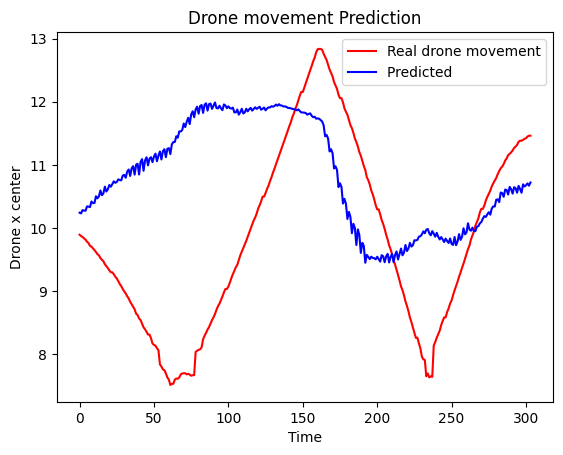

In [84]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real drone movement')
plt.plot(predicted_distance, color = 'blue', label = 'Predicted ')
plt.title('Drone movement Prediction')
plt.xlabel('Time')
plt.ylabel('Drone x center')
plt.legend()
plt.show()